## Tesla Stock Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# read csv file
dataframe = pd.read_csv('TSLA.csv')

In [3]:
dataframe.head()

,Time,First,Last
0,08/02/2010 09:00:00.000,20.40,20.74
1,08/02/2010 10:00:00.000,20.74,20.56
2,08/02/2010 11:00:00.000,20.59,20.65
3,08/02/2010 12:00:00.000,20.63,20.67
4,08/02/2010 13:00:00.000,20.68,20.68


### Convert Time into default pandas date time format

In [4]:
dataframe['Time']=pd.to_datetime(dataframe['Time'],infer_datetime_format=True)

In [5]:
dataframe.head()

,Time,First,Last
0,2010-08-02 09:00:00,20.40,20.74
1,2010-08-02 10:00:00,20.74,20.56
2,2010-08-02 11:00:00,20.59,20.65
3,2010-08-02 12:00:00,20.63,20.67
4,2010-08-02 13:00:00,20.68,20.68


### Take Average value of opening and closing stock for smoothness  

In [6]:
dataset = (0.5*(dataframe['First'] + dataframe['Last'])).values

In [7]:
print(dataset)

[  20.57    20.65    20.62  ...,  203.68   204.835  205.4  ]


### Scaling the dataset 

In [8]:
scaler = MinMaxScaler()
dataset = MinMaxScaler.fit_transform(scaler, dataset)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [9]:
print(dataset)

[ 0.01145074  0.01174768  0.01163632 ...,  0.69110851  0.69539558
  0.69749272]


### Time delay function create time sequence of given delay

In [10]:
def timeDelay(data, delay):
    X_data, y_data = [], []
    #naive version, vectorized version can be implemented,
    #but may run out of memory,
    for i in range(delay, len(data)):
        X_data.append(data[i - (delay):i].tolist())
    X_data = np.array(X_data)
    #print(X_data)
    y_data = data[delay:]
    return np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1)), np.reshape(y_data, (len(y_data),))

### Creating LSTM model

In [11]:
def model():
    model = Sequential()
    model.add(LSTM(4,input_shape=(5, 1), dropout=0.2))
    model.add(Dense(1))
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

### Define parameters

In [12]:
ratio = 0.8 # Training test ratio
d = 5 # Delay
X, y = timeDelay(dataset, d)
n = int(ratio * len(X))

In [13]:
X_train, y_train = X[:n], y[:n]
X_test, y_test = X[n:], y[n:]

In [14]:
model = model()

Compilation Time :  0.02055525779724121


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101.0
Trainable params: 101
Non-trainable params: 0.0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
1s - loss: 0.0557
Epoch 2/30
0s - loss: 0.0253
Epoch 3/30
0s - loss: 0.0142
Epoch 4/30
0s - loss: 0.0111
Epoch 5/30
0s - loss: 0.0091
Epoch 6/30
0s - loss: 0.0082
Epoch 7/30
0s - loss: 0.0072
Epoch 8/30
0s - loss: 0.0073
Epoch 9/30
0s - loss: 0.0063
Epoch 10/30
0s - loss: 0.0059
Epoch 11/30
0s - loss: 0.0060
Epoch 12/30
0s - loss: 0.0056
Epoch 13/30
0s - loss: 0.0052
Epoch 14/30
0s - loss: 0.0048
Epoch 15/30
0s - loss: 0.0038
Epoch 16/30
0s - loss: 0.0031
Epoch 17/30
0s - loss: 0.0024
Epoch 18/30
0s - loss: 0.0022
Epoch 19/30
0s - loss: 0.0020
Epoch 20/30
0s - loss: 0.0020
Epoch 21/30
0s - loss: 0.0016
Epoch 22/30
0s - loss: 0.0018
Epoch 23/30
0s - loss: 0.0013
Epoch 24/30
0s - loss: 0.0013
Epoch 25/30
0s - loss: 0.0012
Epoch 26/30
0s - loss: 0.0014
Epoch 27/30
0s - loss: 0.0012
Epoch 28/30
0s - loss: 9.5486e-04
Epoch 29/30
0s - loss: 0.0013
Epoch 30/30
0s - loss: 0.0010


In [18]:
baseline_testScore = scaler.inverse_transform(np.array([[mean_squared_error(y_test[10:], y_test[:-10])**.5]]))
trainScore = scaler.inverse_transform(np.array([[model.evaluate(X_train, y_train, verbose=0)**.5]]))
testScore = scaler.inverse_transform(np.array([[model.evaluate(X_test, y_test, verbose=0)**.5]]))

print('baseline test score = %.2f RMSE' % baseline_testScore)
print('train score = %.2f RMSE' % trainScore)
print('test score = %.2f RMSE' % testScore)

baseline test score = 24.17 RMSE
train score = 43.37 RMSE
test score = 61.25 RMSE


In [19]:
# generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [20]:
y = np.append(y_train, y_test)

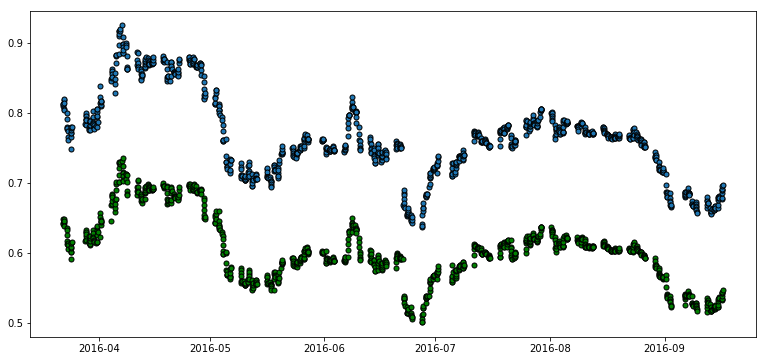

In [21]:
nn = 1000
plt.figure(figsize=(13, 6))
plt.plot(dataframe['Time'][3:][-nn:], np.append(y_train, y_test)[-nn:], 'o', ms=5,markeredgecolor='k')
#plt.plot(dataframe['Time'][3:][:n], y_train_pred, 'r')
plt.plot(dataframe['Time'][3:][n:][-nn:], y_test_pred[-nn:], 'o', ms=5, color='green',markeredgecolor='k')